<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5B

# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.  The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.  

### Instructions:
Choose the independent variables to creata a decent predictive model using multiple linear regression

## Import libraries 🐍

In [1390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## A. Understanding the Dataset

In [1391]:
df = pd.read_csv("house_prices.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [1392]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
444,3220000,3120,3,1,2,no,no,no,no,no,0,no,furnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
239,4585000,4000,3,1,2,yes,no,no,no,no,1,no,furnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
135,5775000,6000,3,2,4,yes,no,no,no,yes,0,no,unfurnished
81,6615000,4000,3,2,2,yes,no,yes,no,yes,1,no,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
353,3780000,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
323,4025000,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished


In [1393]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1394]:
df.shape # data shape

(545, 13)

In [1395]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [1396]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1397]:
df.duplicated().sum()

0

## B. Data Visualization

1. Use a `.scatterplot()` to check the relationship between area and price

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='area', ylabel='price'>

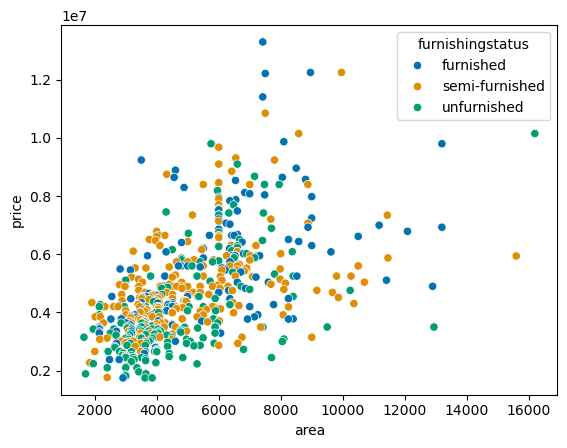

In [1398]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

2. Create a `.pairplot()` to check the relationships between the independent and dependent variables

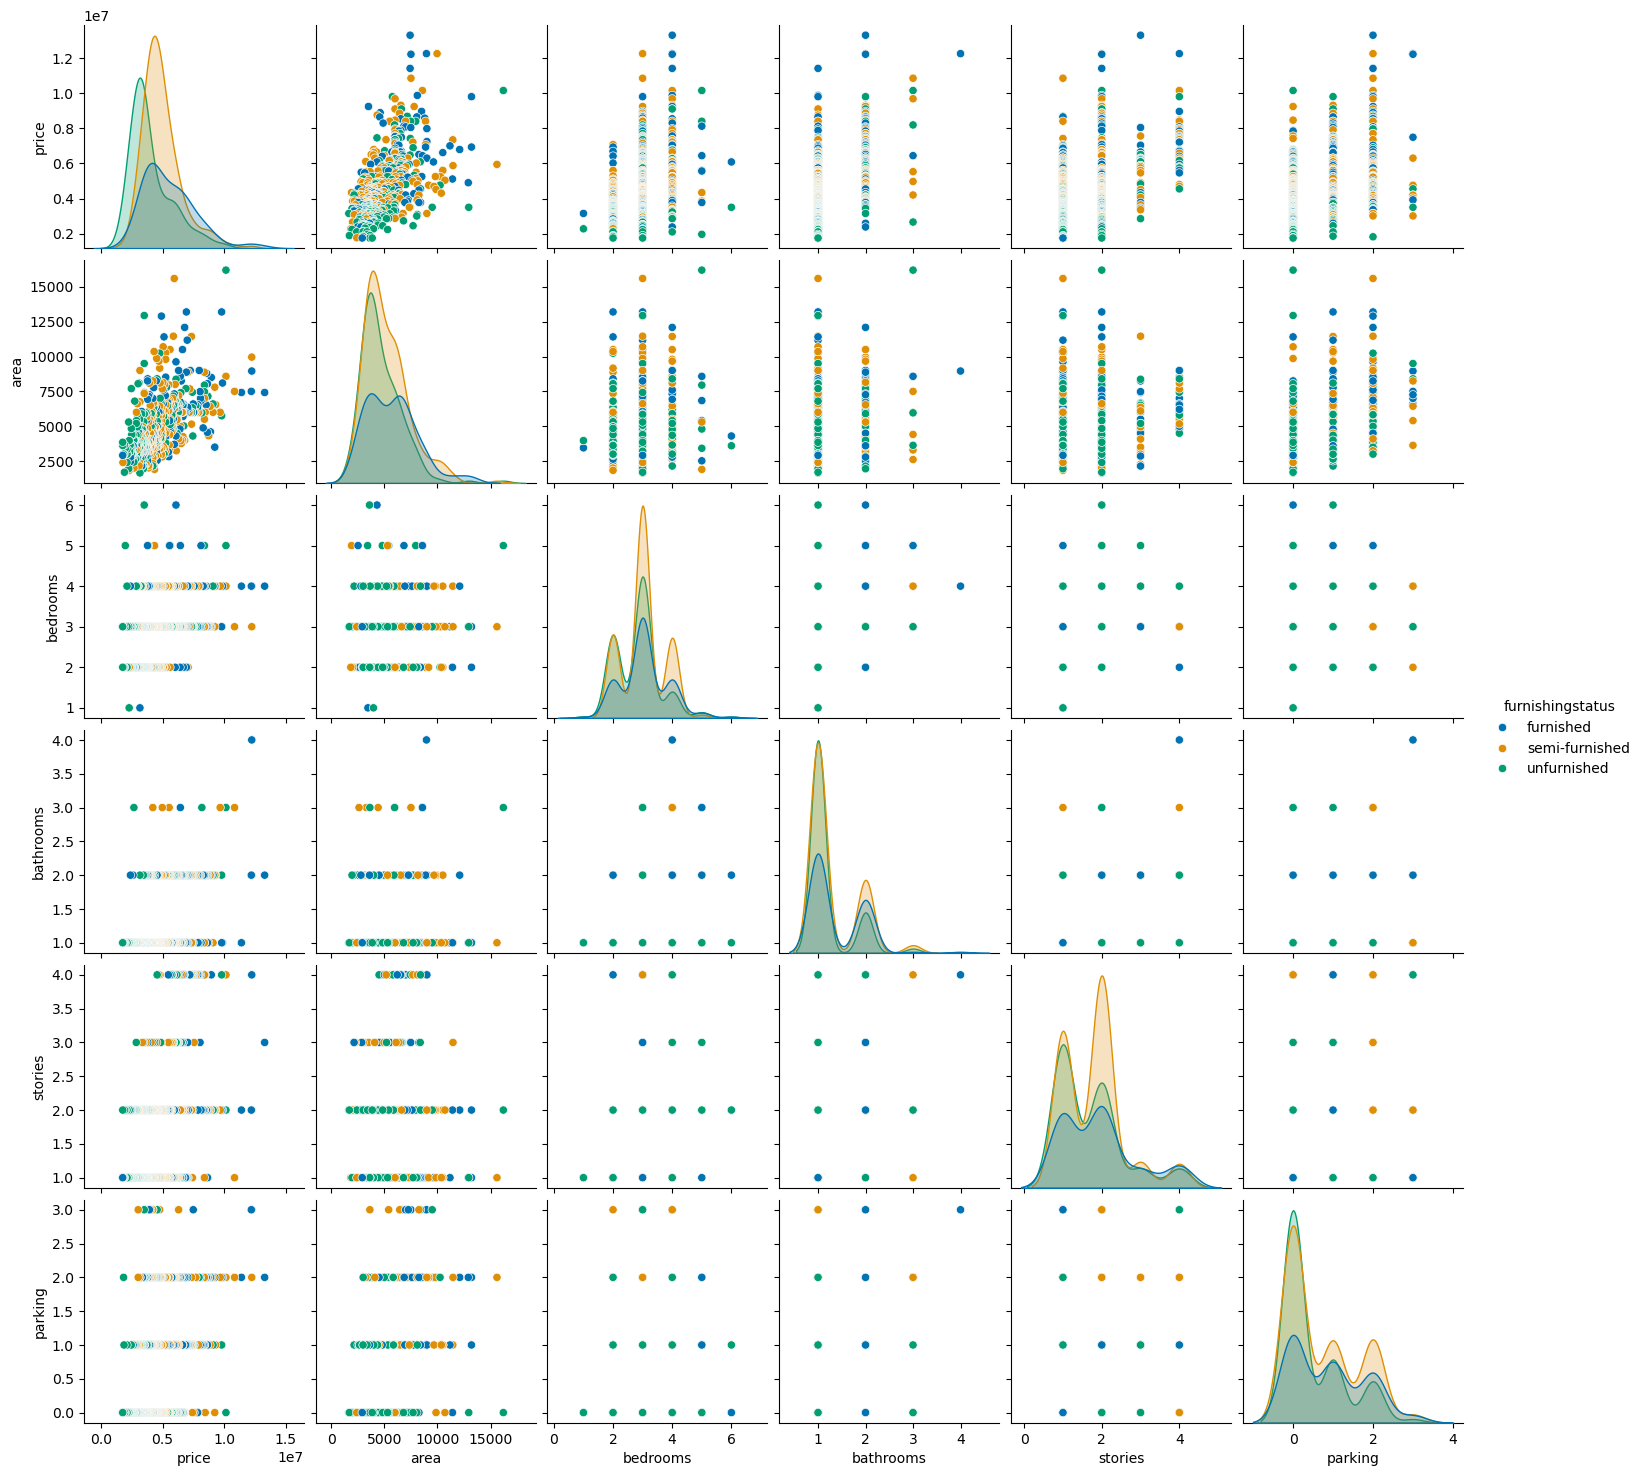

In [1399]:
sns.pairplot(df,hue="furnishingstatus")

## C. Data pre-processing

3. Create a copy of the dataframe using `.copy()`

In [1400]:
data=df.copy()

4. Apply the `get_dummies()` method to convert the categorical columns below into numbers/dummy variables.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [1401]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)

In [1402]:
status

,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,False,False,True,False,False,False,True,True
1,False,False,True,False,False,False,True,False
2,True,False,True,False,True,False,False,True
3,False,False,True,False,True,False,True,True
4,False,False,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...
540,False,True,True,False,True,False,False,False
541,True,False,False,False,False,False,False,False
542,False,True,True,False,False,False,False,False
543,False,False,False,False,False,False,False,False


5. Concatenate the converted columns to the dataframe copy using `.concat()`

In [1403]:
data = pd.concat([data, status], axis = 1)

In [1404]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,False,False,True,True,True,False,True,False


6. Drop the categorical columns below using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [1405]:
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

In [1406]:

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


## D. Feature Selection

7. Use `.corr()` to check for multicollinearity between the features/independent variables

In [1407]:
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.063656,-0.280587,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.006156,-0.142278,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.050040,-0.126252,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.029834,-0.132107,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.003648,-0.082972,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.041327,-0.165705,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,1.000000,-0.588405,0.011450,0.005821,0.050284,0.063819,-0.053179,-0.011535
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.588405,1.000000,-0.133123,-0.099023,-0.117935,-0.059194,-0.094086,-0.081271
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.011450,-0.133123,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.005821,-0.099023,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897


In [1408]:
# ['bedrooms', 'stories', 'parking', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'prefarea_yes']

8. Create a heatmap using `.heatmap()` to visualize the correlation in a plot.

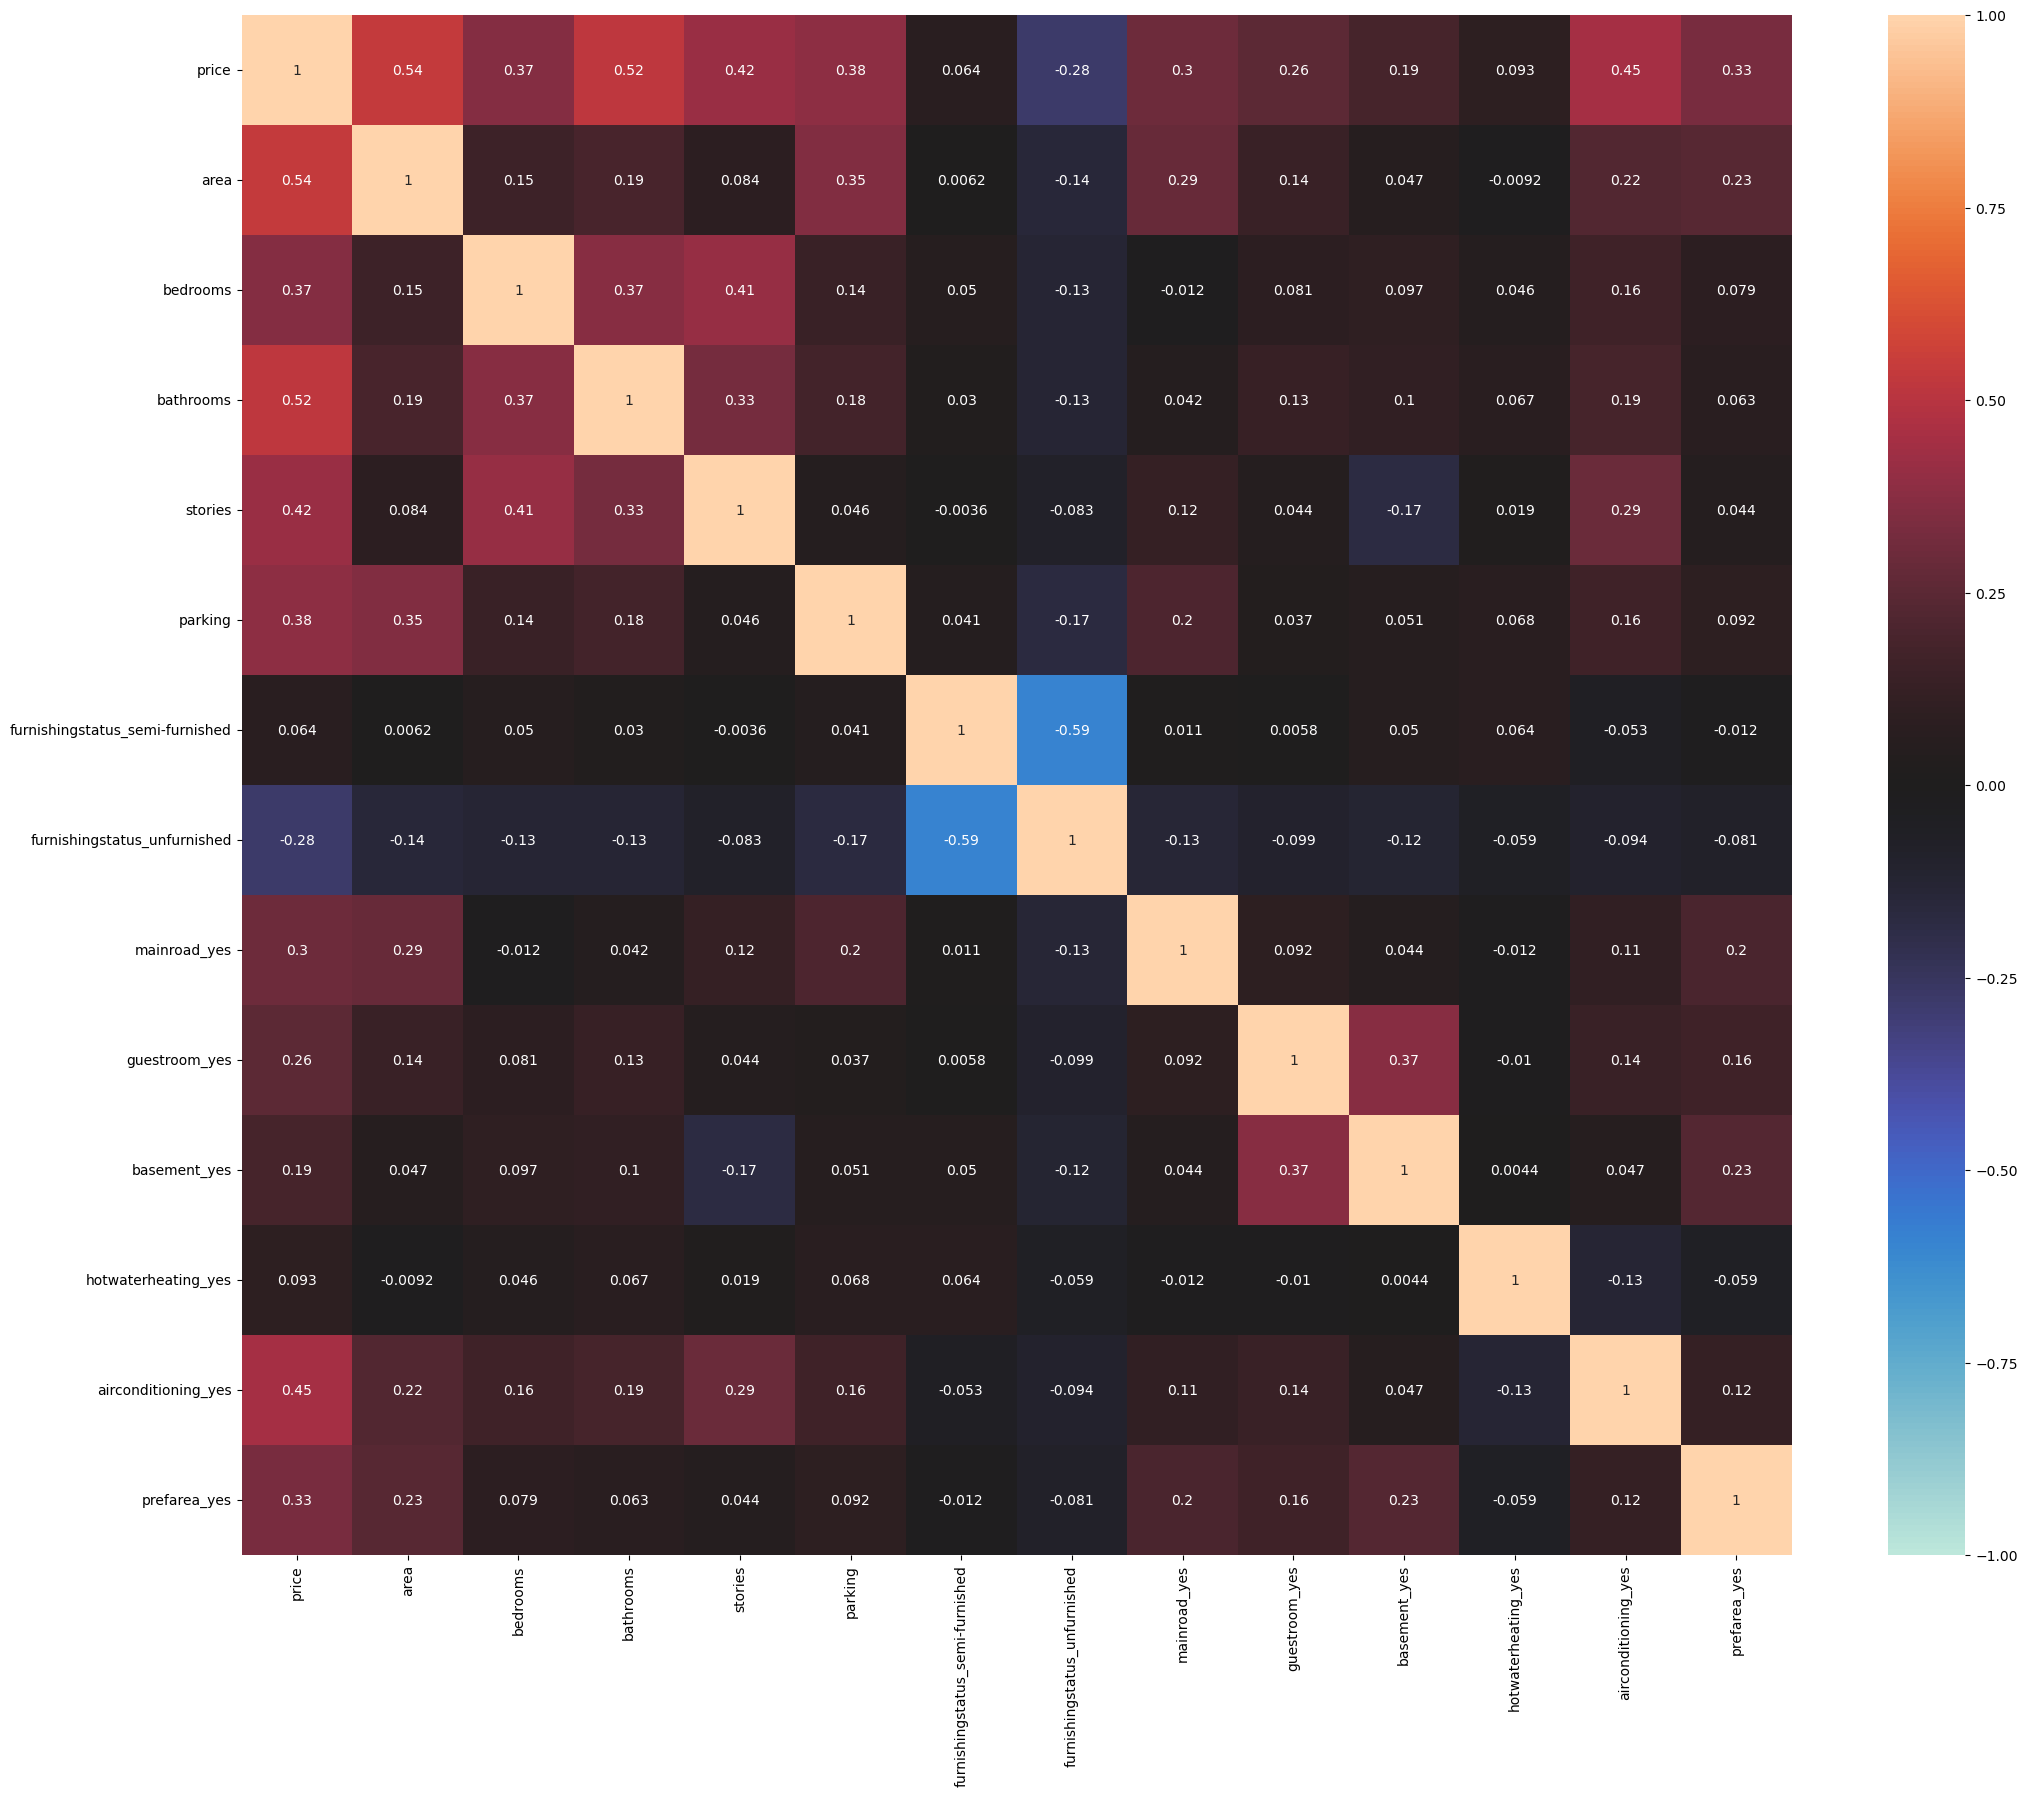

In [1409]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## E. Building the Model



9. Split the data set into a training and test set

In [1483]:
X = data.drop(['price', 'hotwaterheating_yes'],axis=1)

X = sm.add_constant(X)

y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=51)

10. Use the the `MinMaxScaler()` method to apply scaling on the independent variables in the training and test set.

In [1484]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [1485]:
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
9,1.0,5750,3,2,4,1,False,True,True,True,False,True,True
348,1.0,3150,2,2,1,0,True,False,False,False,True,False,False
94,1.0,6000,4,2,4,1,True,False,True,False,False,False,False
257,1.0,8250,3,1,1,0,False,False,True,False,False,False,False
44,1.0,6000,4,2,4,1,False,False,True,False,False,True,False


12. Create a new dataframe containing the scaled features

In [1486]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
0,0.0,0.293907,0.4,0.333333,1.0,0.333333,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,0.0,0.107527,0.2,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.311828,0.6,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.473118,0.4,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.311828,0.6,0.333333,1.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0


13. Create a new instance of a Linear Regression model  

In [1487]:
model = LinearRegression()

14. Use the `fit()` method to train your model using the training set.

In [1488]:
model.fit(X_train_scaled, y_train)

LinearRegression()

15. Use the `predict()` method using the test set

In [1489]:
y_pred = model.predict(X_test_scaled)


16. Compute the $R^2$ of the model

In [1490]:
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

c:\Users\carla\miniconda3\envs\COM222ML\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              344.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                   1.33e-103
Time:                        18:00:01   Log-Likelihood:                         -2487.2
No. Observations:                 164   AIC:                                      4998.
Df Residuals:                     152   BIC:                                      5036.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1          5.293e+06   5.79e+05      9.137      0.000    4.15e+06    6.44e+06
x2          1.706e+06   5.05e+05      3.378      0.001    7.08e+05     2.7e+06
x3          2.614e+06   5.47e+05      4.774      0.000    1.53e+06     3.7e+06
x4          1.298e+06    3.2e+05      4.058      0.000    6.66e+05    1.93e+06
x5          5.484e+05   3.03e+05      1.812      0.072   -4.96e+04    1.15e+06
x6          5.766e+05   1.93e+05      2.982      0.003    1.95e+05    9.59e+05
x7          2.816e+05   1.93e+05      1.462      0.146   -9.89e+04    6.62e+05
x8          1.037e+06   2.02e+05      5.126      0.000    6.37e+05    1.44e+06
x9          2.365e+05   2.42e+05      0.976      0.331   -2.42e+05    7.15e+05
x10         4.024e+05   1.94e+05      2.071      0.040    1.85e+04    7.86e+05
x11         8.481e+05   1.72e+05      4.924      0.000    5.08e+05    1.19e+06
x12          7.02e+05   1.95e+05      3.594      0.000    3.16e+05    1.09e+06
==============================================================================
Omnibus:                        3.535   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.146
Skew:                           0.330   Prob(JB):                        0.207
Kurtosis:                       3.161   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1491]:
print("R-squared: ", olsmod.rsquared)

R-squared:  0.9645257919555308
